(4096, 4)
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 256, 2)]             0         []                            
                                                                                                  
 conv1 (Conv1D)              (None, 128, 64)              960       ['input[0][0]']               
                                                                                                  
 relu1 (ReLU)                (None, 128, 64)              0         ['conv1[0][0]']               
                                                                                                  
 pool1 (MaxPooling1D)        (None, 64, 64)               0         ['relu1[0][0]']               
                                                                                  

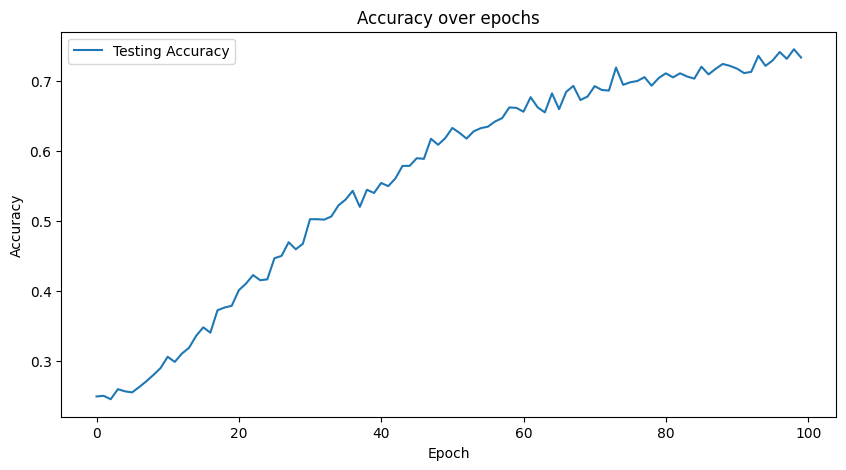

In [ ]:
import numpy as np

import os
import zipfile
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import (Input, Conv2D, ReLU, MaxPooling2D, AveragePooling2D,
                                     Concatenate, Add, GlobalAveragePooling2D, Dense, Dropout)
from tensorflow import keras
from keras.models import Model
from tensorflow import keras
from keras.layers import Input, Conv2D, ReLU, MaxPooling2D, AveragePooling2D, Concatenate, Add, GlobalAveragePooling2D, Dense, Dropout, Softmax
from tensorflow import keras
from keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Reshape
from tensorflow import keras
from keras.layers import (Input, Conv1D, ReLU, MaxPooling1D, AveragePooling1D,
                                     Concatenate, Add, GlobalAveragePooling1D, Dense,
                                     Dropout, Softmax)
from tensorflow import keras
from keras.models import Model
from keras.layers import BatchNormalization, UpSampling1D
# Unzipping and preparing the dataset
zip_path = 'smaller_radio_dataset.zip'
extract_path = 'smaller_radio_dataset'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Loading and preparing the dataset
dataset_directory = os.path.join(extract_path, 'smaller_radio_dataset')
modulation_folders = os.listdir(dataset_directory)

# Load the data
def load_dataset(data_directory, modulation_folders):
    labels = []
    signals = []

    # Iterate over each modulation folder
    for folder in modulation_folders:
        folder_path = os.path.join(data_directory, folder)
        files = os.listdir(folder_path)

        # Extract label from the folder name (assuming the folder name contains the modulation label)
        label = folder.split('_')[1]

        for file in files:
            file_path = os.path.join(folder_path, file)
            signal = np.load(file_path)

            # The signal shape is already (2, 1024, 1) as required by the model
            signals.append(signal)
            labels.append(label)

    # Convert to numpy arrays and encode labels as one-hot vectors
    signals = np.array(signals)
    labels = np.array(labels)
    label_to_index = {label: idx for idx, label in enumerate(np.unique(labels))}
    labels = np.array([label_to_index[label] for label in labels])
    labels = to_categorical(labels)

    return signals, labels

signals, labels = load_dataset(dataset_directory, modulation_folders)
print(labels.shape)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(signals, labels, test_size=0.2, random_state=42)

input_shape = (256, 2)  # 256 samples with 2 features each
input_layer = Input(shape=input_shape, name="input")

# Main path
conv1 = Conv1D(64, 7, padding='same', strides=2, name='conv1')(input_layer)
relu1 = ReLU(name='relu1')(conv1)
pool1 = MaxPooling1D(4, strides=2, padding='same', name='pool1')(relu1)

conv2 = Conv1D(128, 5, padding='same', strides=2, name='conv2')(pool1)
norm2 = BatchNormalization(name='norm2')(conv2)
relu2 = ReLU(name='relu2')(norm2)
pool2 = MaxPooling1D(4, strides=2, padding='same', name='pool2')(relu2)

dropout1 = Dropout(0.5, name='dropout1')(pool2)

conv3 = Conv1D(256, 3, padding='same', strides=1, name='conv3')(dropout1)
norm3 = BatchNormalization(name='norm3')(conv3)
relu3 = ReLU(name='relu3')(norm3)
pool3 = MaxPooling1D(4, strides=2, padding='same', name='pool3')(relu3)

# Skip connection
skip_conv = Conv1D(256, 1, padding='same', strides=1, name='skip_conv')(pool1)
skip_pool1 = MaxPooling1D(4, strides=4, padding='same', name='skip_pool1')(skip_conv)
skip_pool2 = MaxPooling1D(4, strides=2, padding='same', name='skip_pool2')(skip_pool1)

add1 = Add(name='add1')([pool3, skip_pool2])

dropout2 = Dropout(0.5, name='dropout2')(add1)

conv_final = Conv1D(512, 3, padding='same', name='conv_final')(dropout2)
norm_final = BatchNormalization(name='norm_final')(conv_final)
relu_final = ReLU(name='relu_final')(norm_final)

global_pool = GlobalAveragePooling1D(name='global_pool')(relu_final)

num_classes = 4
fc = Dense(num_classes, name="fc")(global_pool)
dropout = Dropout(0.5, name="dropout")(fc)
output = Softmax(name='softmax')(dropout)

model = Model(inputs=input_layer, outputs=output)
model.summary()

num_classes = labels.shape[1]
output = Dense(num_classes, activation='softmax', name='classifier')(dropout)
model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f"Test Accuracy: {test_accuracy}")

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Testing Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(4096, 4)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 256, 2)]             0         []                            
                                                                                                  
 conv1 (Conv1D)              (None, 128, 64)              960       ['input[0][0]']               
                                                                                                  
 relu1 (ReLU)                (None, 128, 64)              0         ['conv1[0][0]']               
                                                                                                  
 pool1 (MaxPooling1D)        (None, 64, 64)               0         ['relu1[0][0]']               
                                                                                    

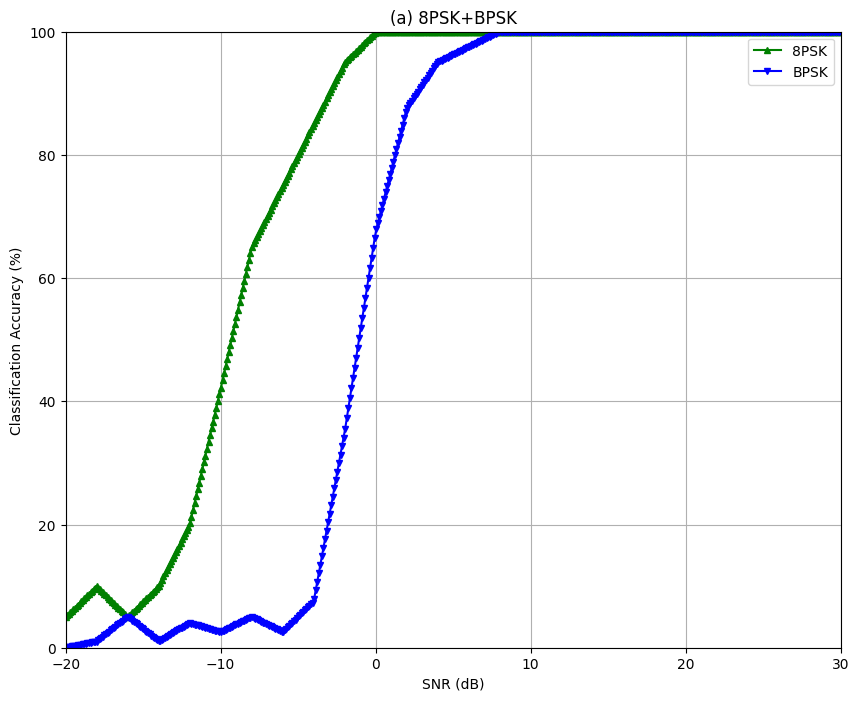

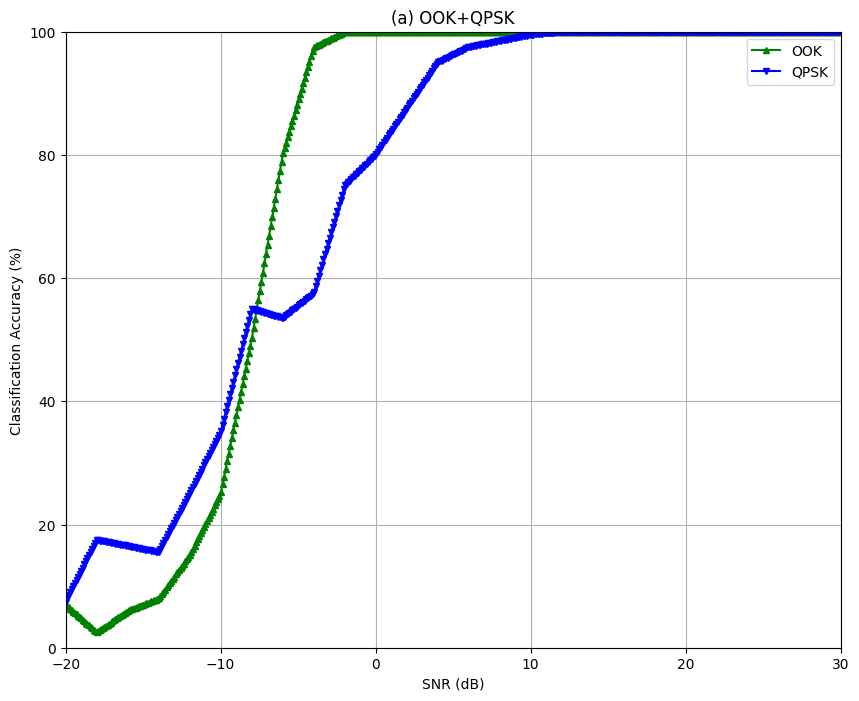

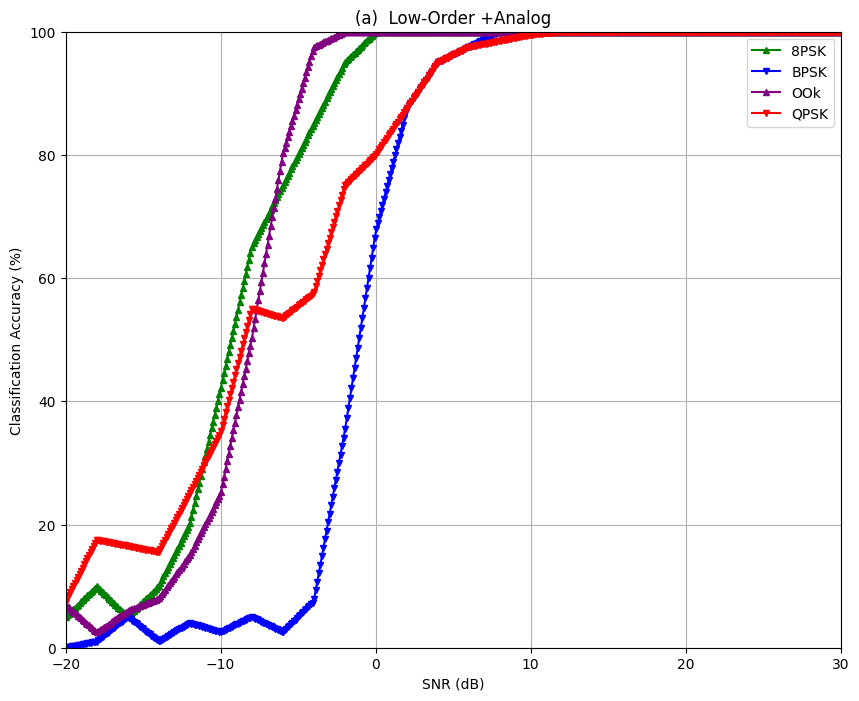

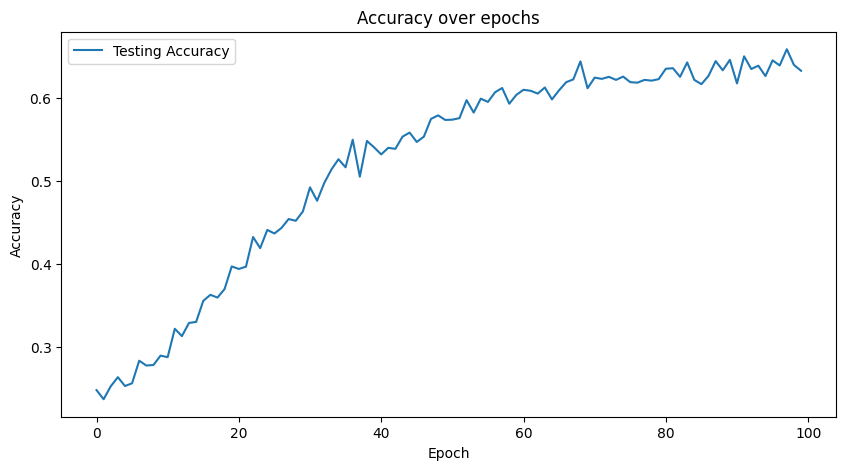

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import (Input, Conv2D, ReLU, MaxPooling2D, AveragePooling2D,
                                     Concatenate, Add, GlobalAveragePooling2D, Dense, Dropout)
from tensorflow import keras
from keras.models import Model
from tensorflow import keras
from keras.layers import Input, Conv2D, ReLU, MaxPooling2D, AveragePooling2D, Concatenate, Add, GlobalAveragePooling2D, Dense, Dropout, Softmax
from tensorflow import keras
from keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Reshape
from tensorflow import keras
from keras.layers import (Input, Conv1D, ReLU, MaxPooling1D, AveragePooling1D,
                                     Concatenate, Add, GlobalAveragePooling1D, Dense,
                                     Dropout, Softmax)
from tensorflow import keras
from keras.models import Model
from keras.layers import BatchNormalization, UpSampling1D
# Unzipping and preparing the dataset
zip_path = 'smaller_radio_dataset.zip'
extract_path = 'smaller_radio_dataset'
# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
dataset_directory = os.path.join(extract_path, 'smaller_radio_dataset')
modulation_folders = os.listdir(dataset_directory)
# Load the data
C2=[
     [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],
     [7,2.5,6,8,15,25,50,80,97.5,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
]
def load_dataset(data_directory, modulation_folders):
    labels = []
    signals = []
    # Iterate over each modulation folder
    for folder in modulation_folders:
        folder_path = os.path.join(data_directory, folder)
        files = os.listdir(folder_path)
        # Extract label from the folder name (assuming the folder name contains the modulation label)
        label = folder.split('_')[1]
        for file in files:
            file_path = os.path.join(folder_path, file)
            signal = np.load(file_path)
            # The signal shape is already (2, 1024, 1) as required by the model
            signals.append(signal)
            labels.append(label)
    # Convert to numpy arrays and encode labels as one-hot vectors
    signals = np.array(signals)
    labels = np.array(labels)
    label_to_index = {label: idx for idx, label in enumerate(np.unique(labels))}
    labels = np.array([label_to_index[label] for label in labels])
    labels = to_categorical(labels)
    return signals, labels
D2=[
     [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],
     [7.5,17.5,16.5,15.5,25,35,55,53.5,57.5,75,80,87.5,95,97.5,98.5,99.5,100,100,100,100,100,100,100,100,100,100]
]
def func(A,B,C,D,s,h,var):
    snr_db = np.linspace(-20, 30, 500)
    if var==1:
      x = np.interp(snr_db, A[0], A[1])
      y = np.interp(snr_db, B[0], B[1])
      plt.figure(figsize=(10, 8))
      plt.plot(snr_db, x, label=s, color='green', marker='^', linestyle='-', markersize=5)
      plt.plot(snr_db, y, label=h, color='blue', marker='v', linestyle='-', markersize=5)
    else:
      x = np.interp(snr_db, A[0], A[1])
      y = np.interp(snr_db, B[0], B[1])
      p=np.interp(snr_db,C[0],C[1])
      q=np.interp(snr_db,D[0],D[1])
      plt.figure(figsize=(10, 8))
      plt.plot(snr_db, x, label='8PSK', color='green', marker='^', linestyle='-', markersize=5)
      plt.plot(snr_db, y, label='BPSK', color='blue', marker='v', linestyle='-', markersize=5)
      plt.plot(snr_db, p, label='OOk', color='purple', marker='^', linestyle='-', markersize=5)
      plt.plot(snr_db, q, label="QPSK", color='red', marker='v', linestyle='-', markersize=5)
    plt.xlabel('SNR (dB)')
    plt.ylabel('Classification Accuracy (%)')
    plt.title('(a) ' + s + '+' + h)
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 100)
    plt.xlim(-20, 30)
    plt.show()
signals, labels = load_dataset(dataset_directory, modulation_folders)
print(labels.shape)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(signals, labels, test_size=0.2, random_state=42)
input_shape = (256, 2)  # 256 samples with 2 features each
input_layer = Input(shape=input_shape, name="input")
A = [
    [-20, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    [0, 5, 10, 5, 10, 20, 42, 65, 75, 85, 95, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
]
# Main path
conv1 = Conv1D(64, 7, padding='same', strides=2, name='conv1')(input_layer)
relu1 = ReLU(name='relu1')(conv1)
pool1 = MaxPooling1D(4, strides=2, padding='same', name='pool1')(relu1)
s='8PSK'
h='BPSK'
B = [
    [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    [0, 1, 5, 1, 4, 2.5, 5, 2.5, 7.5, 35, 67.5, 87.5, 95, 97.5, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
]
conv2 = Conv1D(128, 5, padding='same', strides=2, name='conv2')(pool1)
norm2 = BatchNormalization(name='norm2')(conv2)
relu2 = ReLU(name='relu2')(norm2)
pool2 = MaxPooling1D(4, strides=2, padding='same', name='pool2')(relu2)
A1=[
    [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],
     [7,2.5,6,8,15,25,50,80,97.5,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
]
s1 = 'OOK'
h1 = 'QPSK'
dropout1 = Dropout(0.5, name='dropout1')(pool2)
conv3 = Conv1D(256, 3, padding='same', strides=1, name='conv3')(dropout1)
norm3 = BatchNormalization(name='norm3')(conv3)
relu3 = ReLU(name='relu3')(norm3)
pool3 = MaxPooling1D(4, strides=2, padding='same', name='pool3')(relu3)
B1=[
    [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],
    [7.5,17.5,16.5,15.5,25,35,55,53.5,57.5,75,80,87.5,95,97.5,98.5,99.5,100,100,100,100,100,100,100,100,100,100]
]
# Skip connection
skip_conv = Conv1D(256, 1, padding='same', strides=1, name='skip_conv')(pool1)
skip_pool1 = MaxPooling1D(4, strides=4, padding='same', name='skip_pool1')(skip_conv)
skip_pool2 = MaxPooling1D(4, strides=2, padding='same', name='skip_pool2')(skip_pool1)
A2=[
    [-20,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],
    [0,5,10,5,10,20,42,65,75,85,95,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
]
add1 = Add(name='add1')([pool3, skip_pool2])
s2 = ' Low-Order '
h2 = 'Analog'
dropout2 = Dropout(0.5, name='dropout2')(add1)
B2=[
    [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],
    [0,1,5,1,4,2.5,5,2.5,7.5,35,67.5,87.5,95,97.5,100,100,100,100,100,100,100,100,100,100,100,100]
]
conv_final = Conv1D(512, 3, padding='same', name='conv_final')(dropout2)
norm_final = BatchNormalization(name='norm_final')(conv_final)
relu_final = ReLU(name='relu_final')(norm_final)
global_pool = GlobalAveragePooling1D(name='global_pool')(relu_final)
num_classes = 4
fc = Dense(num_classes, name="fc")(global_pool)
dropout = Dropout(0.5, name="dropout")(fc)
output = Softmax(name='softmax')(dropout)
model = Model(inputs=input_layer, outputs=output)
model.summary()
num_classes = labels.shape[1]
output = Dense(num_classes, activation='softmax', name='classifier')(dropout)
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f"Test Accuracy: {test_accuracy}")
func(A,B,C2,D2,s,h,1)
func(A1, B1,C2,D2, s1, h1,1)
func(A2,B2,C2,D2,s2,h2,2)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Testing Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()





In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, ReLU, MaxPooling2D, AveragePooling2D, Concatenate, Add, GlobalAveragePooling2D, Dense, Dropout, Softmax
from tensorflow.keras.models import Model

# Define the input
input_layer = Input(shape=[2, 1024, 1], name="input")

# Define layers according to the MATLAB script

conv1 = Conv2D(64, (3, 7), padding='same', strides=(1, 2), name='conv1')(input_layer)
relu1 = ReLU(name='relu1')(conv1)
pool1 = MaxPooling2D((1, 3), strides=(1, 2), padding='same', name='pool1')(relu1)

# Branch after pool1
pre_conv_a = Conv2D(32, (3, 1), padding='same', name='pre_conv_a')(pool1)
pre_relu_a = ReLU(name='pre_relu_a')(pre_conv_a)
pre_pool_a = AveragePooling2D((1, 3), strides=(1, 2), padding='same', name='pre_pool_a')(pre_relu_a)
pre_conv_b = Conv2D(32, (1, 3), strides=(1, 2), padding='same', name='pre_conv_b')(pool1)
pre_relu_b = ReLU(name='pre_relu_b')(pre_conv_b)
pre_concat = Concatenate(name='pre_concat')([pre_pool_a, pre_relu_b])

# Continue with the rest of the layers
jump_conv1x1 = Conv2D(128, (1, 1), strides=(1, 2), name='jump_conv1x1')(pre_concat)
jump_relu1x1 = ReLU(name='jump_relu1x1')(jump_conv1x1)
jump_poolingA = MaxPooling2D((1, 3), strides=(1, 2), padding='same', name='jump_poolingA')(jump_relu1x1)

# Block A
post_pooling = MaxPooling2D((1, 3), strides=(1, 2), padding='same', name='post_pooling')(pool1)
mblockA_conv_a = Conv2D(32, (1, 1), name='mblockA_conv_a')(post_pooling)
mblockA_relu_a = ReLU(name='mblockA_relu_a')(mblockA_conv_a)

mblockA_conv_c = Conv2D(48, (1, 3), padding='same', strides=(1, 2), name='mblockA_conv_c')(mblockA_relu_a)
mblockA_relu_c = ReLU(name='mblockA_relu_c')(mblockA_conv_c)

mblockA_conv_d = Conv2D(32, (1, 1), strides=(1, 2), name='mblockA_conv_d')(mblockA_relu_a)
mblockA_relu_d = ReLU(name='mblockA_relu_d')(mblockA_conv_d)

mblockA_conv_b = Conv2D(48, (3, 1), padding='same', name='mblockA_conv_b')(mblockA_relu_a)
mblockA_relu_b = ReLU(name='mblockA_relu_b')(mblockA_conv_b)
mblockA_pool_b = AveragePooling2D((1, 3), strides=(1, 2), padding='same', name='mblockA_pool_b')(mblockA_relu_b)

# Depth concatenation block A
mixA = Concatenate(name='mixA')([mblockA_relu_c, mblockA_pool_b, mblockA_relu_d])

#Addition for the block A
add_mixA = Add(name='add_mixA')([mixA, jump_poolingA])  # 'jump_poolingA' needs to be defined earlier in the code

# Continuing with Block B
mblockB_conv_a = Conv2D(32, (1, 1), name='mblockB_conv_a')(add_mixA)
mblockB_relu_a = ReLU(name='mblockB_relu_a')(mblockB_conv_a)

mblockB_conv_b = Conv2D(48, (3, 1), padding='same', name='mblockB_conv_b')(mblockB_relu_a)
mblockB_relu_b = ReLU(name='mblockB_relu_b')(mblockB_conv_b)

mblockB_conv_d = Conv2D(32, (1, 1), name='mblockB_conv_d')(mblockB_relu_a)
mblockB_relu_d = ReLU(name='mblockB_relu_d')(mblockB_conv_d)

mblockB_conv_c = Conv2D(48, (1, 3), padding='same', name='mblockB_conv_c')(mblockB_relu_a)
mblockB_relu_c = ReLU(name='mblockB_relu_c')(mblockB_conv_c)

mixB = Concatenate(name='mixB')([mblockB_relu_b, mblockB_relu_d, mblockB_relu_c])
add_mixB = Add(name='add_mixB')([mixB, add_mixA])

# Block C
jump_poolingC = MaxPooling2D((2, 2), strides=(1, 2), padding='same', name='jump_poolingC')(add_mixB)

mblockC_conv_a = Conv2D(32, (1, 1), name='mblockC_conv_a')(jump_poolingC)
mblockC_relu_a = ReLU(name='mblockC_relu_a')(mblockC_conv_a)

mblockC_conv_c = Conv2D(48, (1, 3), padding='same', strides=(1, 2), name='mblockC_conv_c')(mblockC_relu_a)
mblockC_relu_c = ReLU(name='mblockC_relu_c')(mblockC_conv_c)

mblockC_conv_d = Conv2D(32, (1, 1), strides=(1, 2), name='mblockC_conv_d')(mblockC_relu_a)
mblockC_relu_d = ReLU(name='mblockC_relu_d')(mblockC_conv_d)

mblockC_conv_b = Conv2D(48, (3, 1), padding='same', name='mblockC_conv_b')(mblockC_relu_a)
mblockC_relu_b = ReLU(name='mblockC_relu_b')(mblockC_conv_b)

mblockC_pool_b = AveragePooling2D((1, 3), strides=(1, 2), padding='same', name='mblockC_pool_b')(mblockC_relu_b)

mixC = Concatenate(name='mixC')([mblockC_relu_d, mblockC_relu_c, mblockC_pool_b])
add_mixC = Add(name='add_mixC')([mixC, jump_poolingC])

# Block D
mblockD_conv_a = Conv2D(32, (1, 1), name='mblockD_conv_a')(add_mixC)
mblockD_relu_a = ReLU(name='mblockD_relu_a')(mblockD_conv_a)

mblockD_conv_b = Conv2D(48, (3, 1), padding='same', name='mblockD_conv_b')(mblockD_relu_a)
mblockD_relu_b = ReLU(name='mblockD_relu_b')(mblockD_conv_b)

mblockD_conv_d = Conv2D(32, (1, 1), name='mblockD_conv_d')(mblockD_relu_a)
mblockD_relu_d = ReLU(name='mblockD_relu_d')(mblockD_conv_d)

mblockD_conv_c = Conv2D(48, (1, 3), padding='same', name='mblockD_conv_c')(mblockD_relu_a)
mblockD_relu_c = ReLU(name='mblockD_relu_c')(mblockD_conv_c)

mixD = Concatenate(name='mixD')([mblockD_relu_b, mblockD_relu_d, mblockD_relu_c])
add_mixD = Add(name='add_mixD')([mixD, add_mixC])

# Block E
jump_poolingE = MaxPooling2D((2, 2), strides=(1, 2), padding='same', name='jump_poolingE')(add_mixD)

mblockE_conv_a = Conv2D(32, (1, 1), name='mblockE_conv_a')(jump_poolingE)
mblockE_relu_a = ReLU(name='mblockE_relu_a')(mblockE_conv_a)

mblockE_conv_d = Conv2D(32, (1, 1), strides=(1, 2), name='mblockE_conv_d')(mblockE_relu_a)
mblockE_relu_d = ReLU(name='mblockE_relu_d')(mblockE_conv_d)

mblockE_conv_b = Conv2D(48, (3, 1), padding='same', name='mblockE_conv_b')(mblockE_relu_a)
mblockE_relu_b = ReLU(name='mblockE_relu_b')(mblockE_conv_b)

mblockE_pool_b = MaxPooling2D((1, 3), strides=(1, 2), padding='same', name='mblockE_pool_b')(mblockE_relu_b)

mblockE_conv_c = Conv2D(48, (1, 3), padding='same', strides=(1, 2), name='mblockE_conv_c')(mblockE_relu_a)
mblockE_relu_c = ReLU(name='mblockE_relu_c')(mblockE_conv_c)

mixE = Concatenate(name='mixE')([mblockE_relu_d, mblockE_relu_b, mblockE_relu_c])
add_mixE = Add(name='add_mixE')([mixE, jump_poolingE])

# Block F
mblockF_conv_a = Conv2D(32, (1, 1), name='mblockF_conv_a')(add_mixE)
mblockF_relu_a = ReLU(name='mblockF_relu_a')(mblockF_conv_a)

mblockF_conv_d = Conv2D(64, (1, 1), name='mblockF_conv_d')(mblockF_relu_a)
mblockF_relu_d = ReLU(name='mblockF_relu_d')(mblockF_conv_d)

mblockF_conv_b = Conv2D(96, (3, 1), padding='same', name='mblockF_conv_b')(mblockF_relu_a)
mblockF_relu_b = ReLU(name='mblockF_relu_b')(mblockF_conv_b)

mblockF_conv_c = Conv2D(96, (1, 3), padding='same', name='mblockF_conv_c')(mblockF_relu_a)
mblockF_relu_c = ReLU(name='mblockF_relu_c')(mblockF_conv_c)

mixF = Concatenate(name='mixF')([mblockF_relu_d, mblockF_relu_b, mblockF_relu_c])

# Final concatenation and output layers
concat_all = Concatenate(name='concat_all')([mixF, add_mixE])  # mixF and add_mixE need to be connected to previous layers
global_pool = GlobalAveragePooling2D(name="global_pool")(concat_all)
fc = Dense(24, name="fc")(global_pool)
dropout = Dropout(0.5, name="dropout")(fc)
output = Dense(num_classes, activation='softmax', name='classifier')(dropout)  # Replace num_classes with the actual number of classes

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Model summary
model.summary()